# 시간 시각화

- 시점 요소가 있는 데이터는 시계열(Time series)형태로 표현할 수 있음
    - 시간의 흐름에 따른 데이터의 변화를 표현
    - 전체적인 흐름을 한 눈에 확인할 수 있고, 데이터의 트렌드나 노이즈도 쉽게 찾아낼 수 있음
    
- 시간 시각화는 선그래프 형태인 연속형과 막대그래프 형태인 분절형으로 구분

- 연속형 시간 시각화
    - 선그래프
    - 시간 간격의 밀도가 높을 때 주로 사용
        - 예) 초 단위의 공정 센서 데이터, 일년간의 일변 판매량 데이터
        
    - 데이터의 양이 너무 많거나 변동이 심하면 트렌드나 패턴을 확인하는 것이 어려울 수 있음
        - 이 경우는 추세선을 삽입하여 들쭉날쭉한 데이터 흐름을 안정된 선으로 표현하는 것도 가능
    
    - 전체적인 경향이나 패턴을 쉽게 파악하는 것이 목적
    - 추세선을 그리는 가장 일반적인 방법은 이동평균(moving average) 방법을 사용하는 것
        - 이동평균법 : 데이터의 연속적인 그룹의 평균을 구하는 것
            - 예) 시간의 흐름에 따라 2, 5, 3, 7, 4 의 값이 있다면 3개 시점씩 평균을 구해 (2, 5, 3)의 평균, (5, 3, 7)의 평균, (3, 7, 4)의 평균으로 표현하는 것
            
- 분절형 시간 시각화
    - 막대그래프, 누적 막대그래프, 점그래프 등
    - 시간의 밀도가 낮은 경우에 주로 사용
        - 예) 1년 동안의 월 간격 단위 흐름
    - 값들의 상대적인 차이를 나타내는 것에 유리
    - 막대에 색상을 표현하여 특정 시점에 대한 정보를 추가할 수도 있음
    
    - 누적 막대그래프는 한 시점에 2개 이상의 세부 항목이 존재할 때 사용
        - 예) A, B, C 품목의 월별 판매량 데이터를 표현하고자 할 때, 각 품목의 판매량을 색상이나 질감으로 차이를 주어 하나의 막대로 표현
        - 각 품목 전체의 합을 함께 표현할 수 있는 것이 장점
        - 각 품목의 판매량을 전체 판매량의 비율로 환산하여 절대적 비율을 비교할 수 있도록 표현할 수도 있음

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
# 데이터 불러오기
df = pd.read_csv("./data/superstore.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


- 일자별 고객들의 제품 판매 정보가 기록되어 있음

In [3]:
df.shape

(9800, 18)

In [5]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [6]:
# date 컬럼 날짜형식 변환
df["date2"] =pd.to_datetime(df["Order Date"], format = "%d/%m/%Y")

In [7]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,date2
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017-11-08
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017-11-08
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017-06-12
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016-10-11
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016-10-11


In [8]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date               object
Ship Date                object
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
date2            datetime64[ns]
dtype: object

In [9]:
# 날짜 오름차순 정렬
df = df.sort_values(by = "date2", ascending = True)

In [11]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,date2
1297,1298,CA-2018-115427,30/12/2018,03/01/2019,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,94533.0,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2018-12-30
906,907,CA-2018-143259,30/12/2018,03/01/2019,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009.0,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136,2018-12-30
645,646,CA-2018-126221,30/12/2018,05/01/2019,Standard Class,CC-12430,Chuck Clark,Home Office,United States,Columbus,Indiana,47201.0,Central,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.300,2018-12-30
908,909,CA-2018-143259,30/12/2018,03/01/2019,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009.0,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,2018-12-30
5091,5092,CA-2018-156720,30/12/2018,03/01/2019,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,Colorado,80538.0,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,2018-12-30


In [12]:
# 연도 컬럼 생성
df["year"] = df["date2"].dt.year

In [14]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,date2,year
7980,7981,CA-2015-103800,03/01/2015,07/01/2015,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2015-01-03,2015
741,742,CA-2015-112326,04/01/2015,08/01/2015,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2015-01-04,2015
740,741,CA-2015-112326,04/01/2015,08/01/2015,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,2015-01-04,2015
739,740,CA-2015-112326,04/01/2015,08/01/2015,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,2015-01-04,2015
1759,1760,CA-2015-141817,05/01/2015,12/01/2015,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143.0,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,2015-01-05,2015


In [17]:
# 선 그래프용 데이터셋 생성(2018년 데이터만 필터링)
df_line = df[df["year"] == 2018]

# 2018년 일별 매출액 가공
df_line = df_line.groupby("date2")["Sales"].sum().reset_index()

In [18]:
df_line.head()

,date2,Sales
0,2018-01-01,1481.828
1,2018-01-02,2079.554
2,2018-01-03,2070.272
3,2018-01-06,33.740
4,2018-01-07,3395.590


- 기존의 Order Date 컬럼을 날짜 형식으로 변환하고 연도 구분 컬럼 생성
- 2018년도 데이터만 필터링
- groupby()를 사용하여 일별 매출액을 가공
    - 일자별로 매출액 합계가 소계

In [19]:
# 30일 일동평균 생성
df_line["ma"] = df_line["Sales"].rolling(window = 30).mean()

In [20]:
df_line.head()

,date2,Sales,ma
0,2018-01-01,1481.828,NaN
1,2018-01-02,2079.554,NaN
2,2018-01-03,2070.272,NaN
3,2018-01-06,33.740,NaN
4,2018-01-07,3395.590,NaN


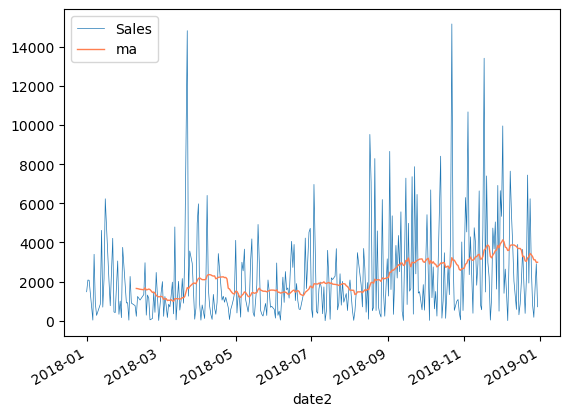

In [21]:
# 선그래프 시각화
ax = df_line.plot(x = "date2", y = "Sales", linewidth = "0.5")
df_line.plot(x = "date2", y = "ma", color = "#FF7F50", linewidth = "1", ax = ax)
plt.show()

- 앞에서 가공한 데이터셋을 활용하여 선 그래프를 시각화
- 30일 이동평균선을 삽입하기 위해 rolling() 함수를 사용하여 ma 컬럼을 새로 생성
- 2018년도의 일자별 매출액이 잘 나타나지만 매출액 편차가 커서 일 매출선으로는 전체적인 추이를 가늠하기 힘듦
    - 이런 경우 이동평균선이 도움이 될 수 있음
    - ma 선을 통해 5월부터 매출이 감소했다가 8월부터 상승하는 것을 직관적으로 확인할 수 있음

## 막대 그래프

In [24]:
# 연도별 판매량 데이터 가공
df_bar_1 = df.groupby("year")["Sales"].sum().reset_index()
df_bar_1.head()

,year,Sales
0,2015,479856.2081
1,2016,459436.0054
2,2017,600192.5500
3,2018,722052.0192


- 막대그래프 시각화를 위해 연도별 매출액 데이터를 가공
    - year 컬럼을 이요앟여 연도별 매출액 합계를 계산

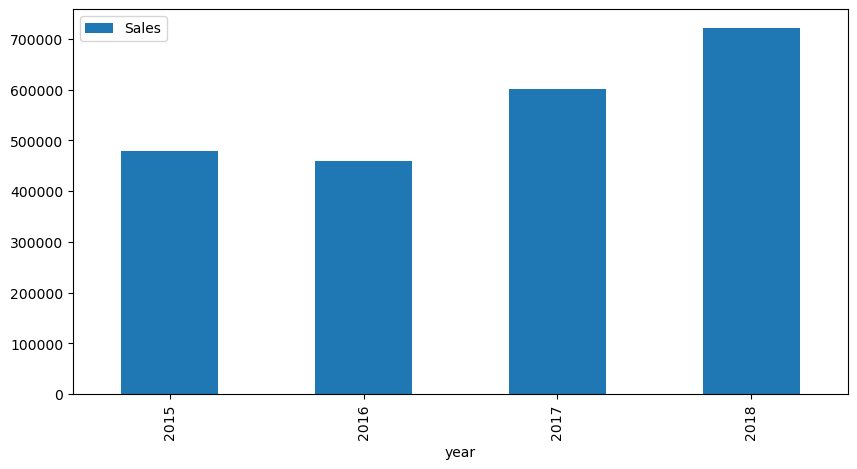

In [25]:
# 연도별 매출액 막대 그래프 시각화
ax = df_bar_1.plot.bar(x = "year", y = "Sales", rot = 90, figsize = (10, 5))
plt.show()

- 단순한 연도별 매출액 막대그래프가 생성됨
- 2016년도에 매출액이 다소 감소했다가 2017, 2018년도에는 증가한 것을 확인할 수 있음

In [26]:
df["Segment"].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [29]:
# 고객 세그먼트를 컬럼으로 피벗
df_bar_2_pv = df.pivot_table(
    index = "year",
    columns = "Segment",
    values = "Sales",
    aggfunc = "sum").reset_index()

df_bar_2_pv.head()

Segment,year,Consumer,Corporate,Home Office
0,2015,262956.8006,127797.4957,89101.9118
1,2016,265356.2933,119675.5989,74404.1132
2,2017,291142.9652,204977.3178,104072.2670
3,2018,328604.4719,236043.6624,157403.8849


- 누적 막대그래프 시각화를 위한 데이터 가공
    - Segment 컬럼을 활용하여 Consumer, Corporate, Home Office 구분에 따라 매출액을 집계

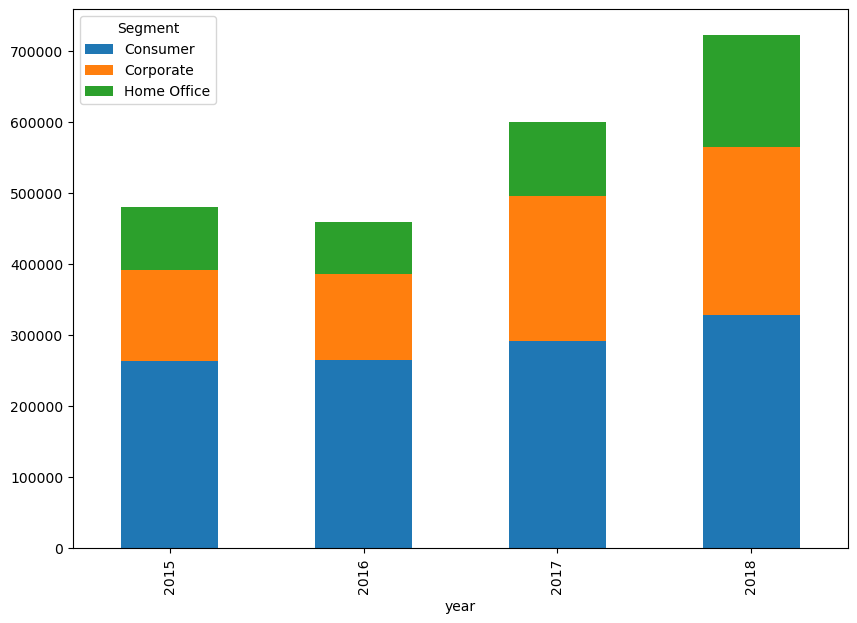

In [30]:
# 연도별 고객 세그먼트별 매출액 누적 막대그래프 시각화
df_bar_2_pv.plot.bar(x = "year", stacked = True, figsize = (10, 7))
plt.show()

- 매출액은 앞의 단순 막대그래프와 동일하지만 세 가지 세그먼트의 각 매출액이 구분되어 표현됨
- 이를 통해 각 연도에서 세그먼트별 매출액 비중이 어느 정도 되는지 파악할 수 있음
- 만약 stacked 옵션을 False로 설정하면 각 연도별로 세 개의 막대그래프가 나오도록 표현됨
- 상황에 따라 옵션을 조정하여 정보전달 효과를 높일 수 있음